In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Import databases
path = r'C:\Users\kaan\Instacart basket analysis July 2025'

In [5]:
df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','final_df.pkl'))
df_active=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','final_project.pkl'))

In [4]:
df.head()

,order_id,User ID,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,First Name,Last Name,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,7.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,7.0,12427,3,0,Original Beef Jerky,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,7.0,26088,4,0,Aged White Cheddar Popcorn,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,7.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


#### PII check
#### This dataset contains some personal information such as (income,age,user_id,etc.) This dataset will only be accessed by authorized personel within the company and any presentations or reports will use aggregated insights without exposing individual personal details.

In [5]:
#creating a region column based on state column
northeast = ["Connecticut", "Maine", "Massachusetts", "New Hampshire", 
             "Rhode Island", "Vermont", "New Jersey", "New York", "Pennsylvania"]
midwest = ["Illinois", "Indiana", "Michigan", "Ohio", "Wisconsin", 
           "Iowa", "Kansas", "Minnesota", "Missouri", 
           "Nebraska", "North Dakota", "South Dakota"]
south = ["Delaware", "Florida", "Georgia", "Maryland", "North Carolina", "South Carolina", 
         "Virginia", "District of Columbia", "West Virginia", "Alabama", "Kentucky", 
         "Mississippi", "Tennessee", "Arkansas", "Louisiana", "Oklahoma", "Texas"]
west = ["Arizona", "Colorado", "Idaho", "Montana", "Nevada", "New Mexico", 
        "Utah", "Wyoming", "Alaska", "California", "Hawaii", "Oregon", "Washington"]

In [6]:
#Assign states to region 
def region(state):
    if state in northeast:
        return "Northeast"
    elif state in midwest:
        return "Midwest"
    elif state in south:
        return "South"
    elif state in west:
        return "West"
    else:
        return "Unknown"

In [7]:
#creating a region column
df["Region"] = df["State"].apply(region)

In [8]:
#checking region cloumn
df["Region"].value_counts()

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [9]:
df.head()

,order_id,User ID,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Last Name,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income,Region
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2539329,1,1,2,8,7.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,2539329,1,1,2,8,7.0,12427,3,0,Original Beef Jerky,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2539329,1,1,2,8,7.0,26088,4,0,Aged White Cheddar Popcorn,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,2539329,1,1,2,8,7.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [10]:
df.columns

Index(['order_id', 'User ID', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'match', 'price_range_loc', 'busiest day',
       'busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency_flag', 'First Name', 'Last Name', 'Gender', 'State',
       'Age', 'Date Joined', 'Number of Dependents', 'Family Status', 'Income',
       'Region'],
      dtype='object')

In [11]:
#checking the spending habits differences between U.S States
pd.crosstab(df["Region"], df["spending_flag"],dropna=False)

spending_flag,High spender,Low spender
Region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40579,10751306
West,31223,8261690


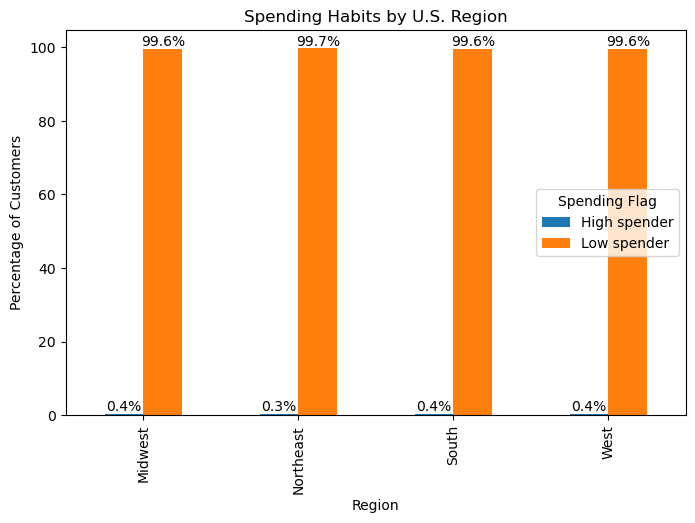

In [12]:
spending_by_region = pd.crosstab(df["Region"], df["spending_flag"], normalize="index") * 100

ax = spending_by_region.plot(kind="bar", stacked=False, figsize=(8,5))
plt.ylabel("Percentage of Customers")
plt.title("Spending Habits by U.S. Region")
plt.legend(title="Spending Flag")

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge")

plt.show()

In [13]:
#exporting the visualization
fig=ax.get_figure()

In [14]:
fig.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','spending_by_region.png'))

In [15]:
#excluding customers who has less order than 5
customer_orders = df.groupby("User ID")["order_number"].max().reset_index()

In [16]:
customer_orders["exclusion_flag"] = customer_orders["order_number"] < 5

In [18]:
df_active = df.merge(customer_orders[["User ID", "exclusion_flag"]], on="User ID", how="left")

In [21]:
df_active = df_active[df_active["exclusion_flag"] == False].copy()

In [ ]:
#exporting new dataset 
df_active.to_pickle(os.path.join(path,'02 Data','Prepared Data','final_project.pkl'))

In [22]:
df_active.head()

,order_id,User ID,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Last Name,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income,Region,exclusion_flag
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,False
1,2539329,1,1,2,8,7.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,False
2,2539329,1,1,2,8,7.0,12427,3,0,Original Beef Jerky,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,False
3,2539329,1,1,2,8,7.0,26088,4,0,Aged White Cheddar Popcorn,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,False
4,2539329,1,1,2,8,7.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,False


In [23]:
df_active.shape

(30964564, 35)

In [20]:
#defining profiles 
def customer_profile(row):
    # Young Adult
    if row['Age'] < 30 and row['Number of Dependents'] == 0:
        return "Young Adult"

    # Young Parent
    if 25 <= row['Age'] <= 40 and row['Number of Dependents'] > 0 :
        return "Young Parent"

    # Wealthy Professional
    if row['Income'] > 100000 and row['Number of Dependents'] <= 1:
        return "Wealthy Professional"

    # Budget-Conscious Family
    if row['Income'] < 60000 and row['Number of Dependents'] >= 2:
        return "Budget-Conscious Family"

    # Retired / Old Adult
    if row['Age'] > 60 :
        return "Retired/Old Adult"

    return "Other"

df_active["customer_profile"] = df_active.apply(customer_profile, axis=1)

In [25]:
#checking customer_profile
df_active['customer_profile'].value_counts(dropna=False)

customer_profile
Other                      9041143
Wealthy Professional       6983337
Retired/Old Adult          6058672
Young Parent               5778490
Budget-Conscious Family    1655304
Young Adult                1447618
Name: count, dtype: int64

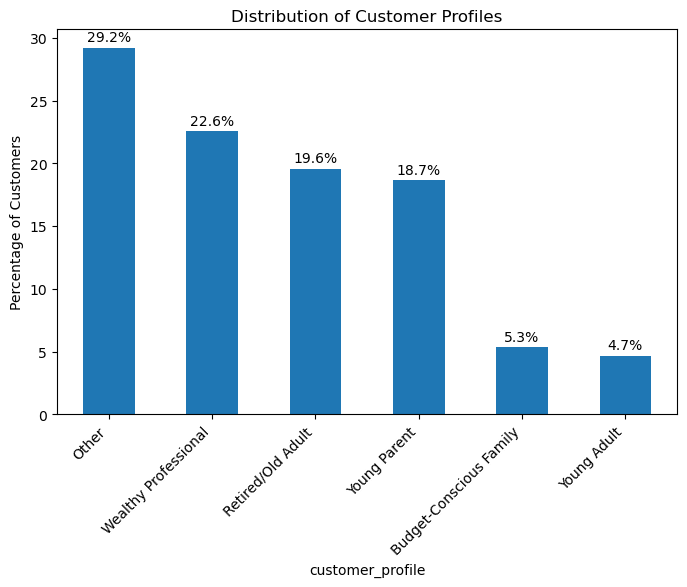

In [26]:
# distribution of profiles
profile_bar = df_active["customer_profile"].value_counts(normalize=True) * 100

ax = profile_bar.plot(kind="bar", figsize=(8,5))
plt.ylabel("Percentage of Customers")
plt.title("Distribution of Customer Profiles")
plt.xticks(rotation=45, ha="right")

for i, v in enumerate(profile_bar):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha="center")

plt.show()

In [27]:
bar_customer_profile=ax.get_figure()

In [28]:
bar_customer_profile.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','distribution_of_customer_profiles.png'))

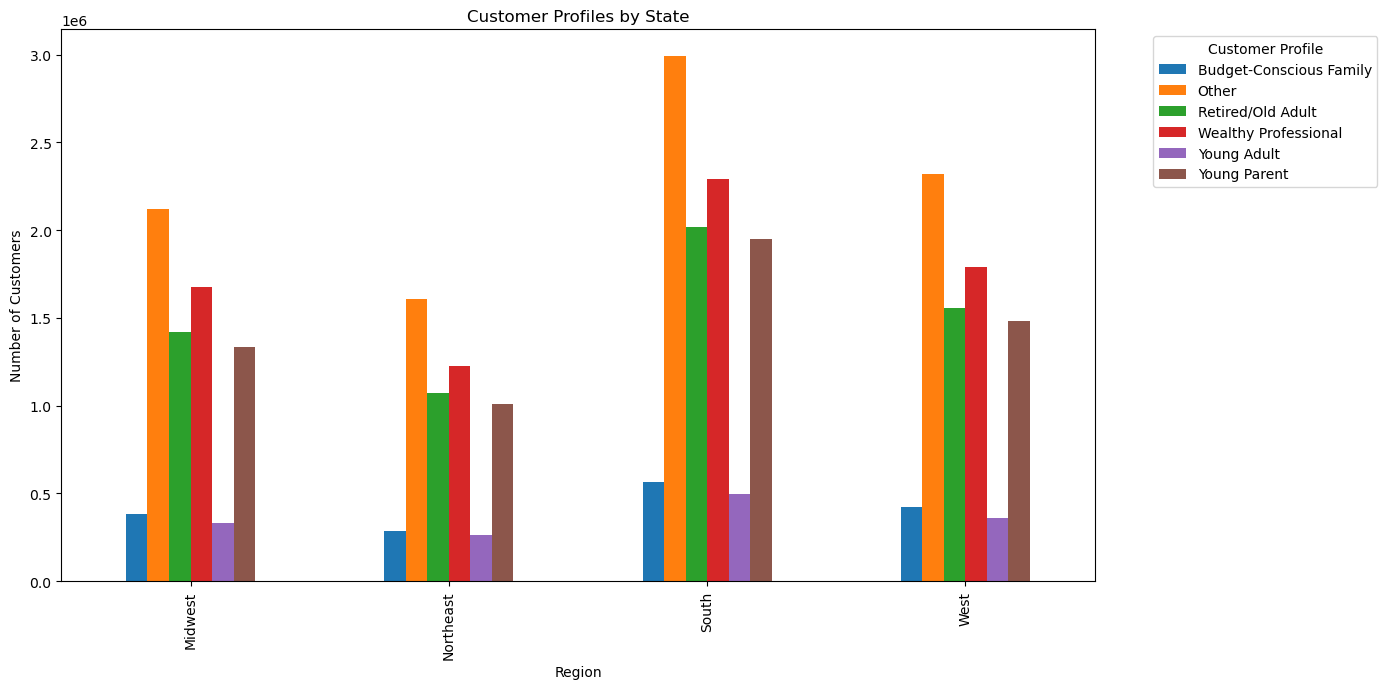

In [32]:
#Customer profiles by region
state_profile_counts = pd.crosstab(df_active["Region"], df_active["customer_profile"])

ax = state_profile_counts.plot(kind="bar", stacked=False, figsize=(14,7))

plt.title("Customer Profiles by State")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=90)  
plt.legend(title="Customer Profile", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [33]:
bar_cust_region=ax.get_figure()

In [34]:
bar_cust_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','distribution_of_customer_profiles_region.png'))

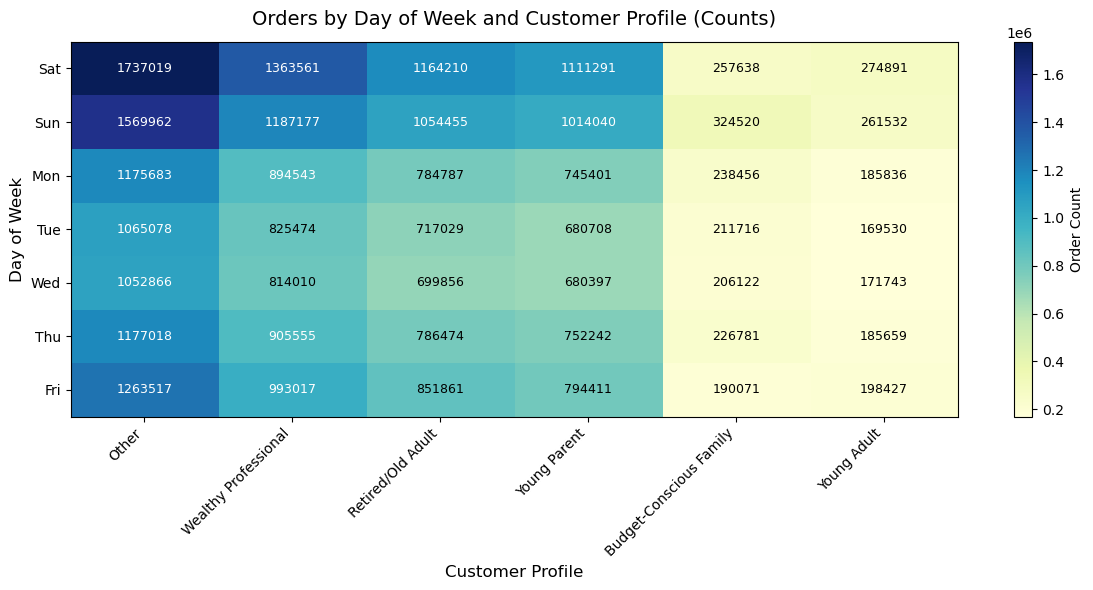

In [35]:
dow_profile_ct = pd.crosstab(df_active["orders_day_of_week"], df_active["customer_profile"])

profile_order = dow_profile_ct.sum(axis=0).sort_values(ascending=False).index.tolist()
dow_profile_ct = dow_profile_ct[profile_order]

day_labels_map = {0:"Sat", 1:"Sun", 2:"Mon", 3:"Tue", 4:"Wed", 5:"Thu", 6:"Fri"}
y_ticks = list(dow_profile_ct.index)
y_ticklabels = [day_labels_map.get(int(v), str(v)) for v in y_ticks]

fig, ax = plt.subplots(figsize=(12, 6))
im = ax.imshow(dow_profile_ct.values, aspect="auto", cmap="YlGnBu")

ax.set_title("Orders by Day of Week and Customer Profile (Counts)", fontsize=14, pad=12)
ax.set_xlabel("Customer Profile", fontsize=12)
ax.set_ylabel("Day of Week", fontsize=12)

ax.set_xticks(np.arange(dow_profile_ct.shape[1]))
ax.set_xticklabels(dow_profile_ct.columns, rotation=45, ha="right")

ax.set_yticks(np.arange(dow_profile_ct.shape[0]))
ax.set_yticklabels(y_ticklabels)

vals = dow_profile_ct.values
threshold = vals.max() / 2

for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        color = "white" if vals[i, j] > threshold else "black"
        ax.text(j, i, f"{int(vals[i, j])}", ha="center", va="center", color=color, fontsize=9)

cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Order Count", rotation=90)

plt.tight_layout()
plt.show()

In [36]:
heatmap=ax.get_figure()

In [37]:
heatmap.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','orders_by_dow_profile.png'))

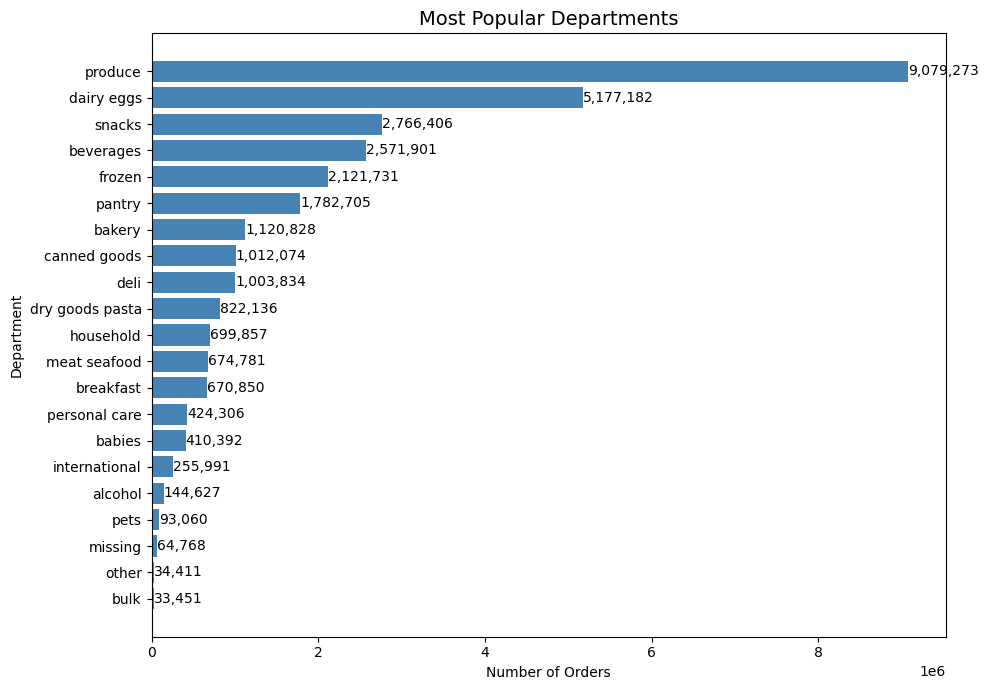

In [14]:

dept_map = {
    1: "frozen",
    2: "other",
    3: "bakery",
    4: "produce",
    5: "alcohol",
    6: "international",
    7: "beverages",
    8: "pets",
    9: "dry goods pasta",
    10: "bulk",
    11: "personal care",
    12: "meat seafood",
    13: "pantry",
    14: "breakfast",
    15: "canned goods",
    16: "dairy eggs",
    17: "household",
    18: "babies",
    19: "snacks",
    20: "deli",
    21: "missing"
}
df_active["department_name"] = df_active["department_id"].map(dept_map)

dept_counts = df_active["department_name"].value_counts().sort_values(ascending=True)

ax=plt.figure(figsize=(10,7))
bars = plt.barh(dept_counts.index, dept_counts.values, color="steelblue")

for bar in bars:
    plt.text(bar.get_width() + 500, 
             bar.get_y() + bar.get_height()/2,
             f"{int(bar.get_width()):,}", va="center")

plt.title("Most Popular Departments", fontsize=14)
plt.xlabel("Number of Orders")
plt.ylabel("Department")
plt.tight_layout()
plt.show()

In [15]:
department_popularity=ax.get_figure()

In [16]:
department_popularity.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_popularity.png'))

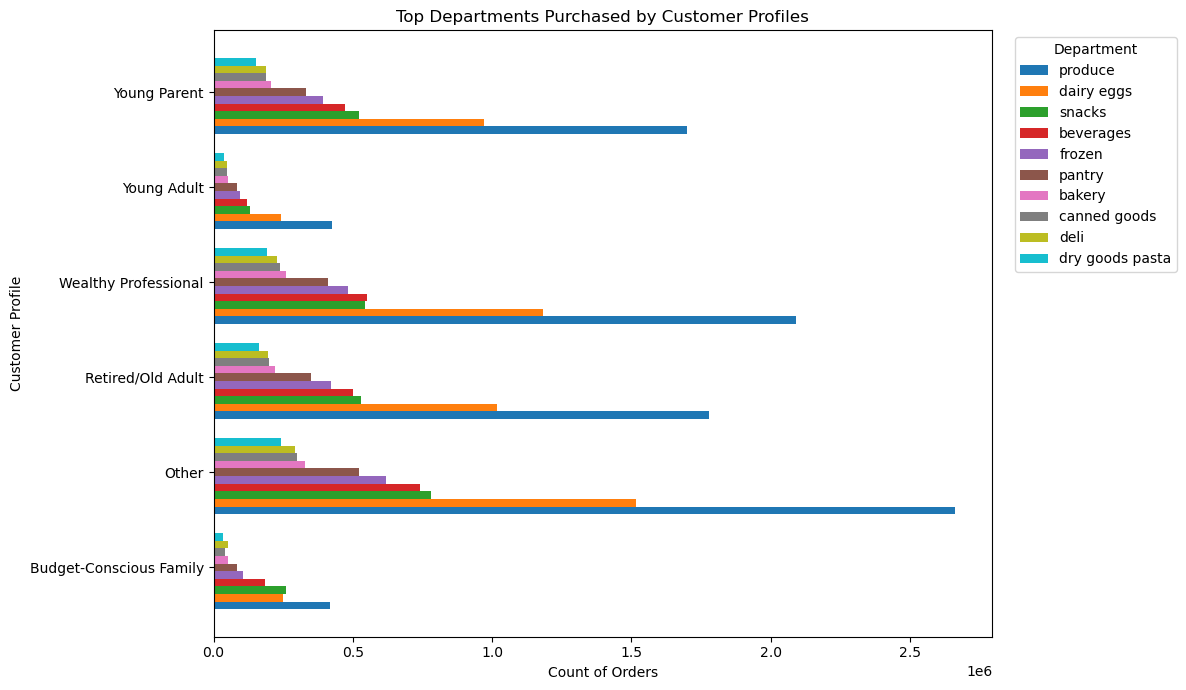

In [22]:
# 1) department_id → department_name eşleşmesi
df_active["department_name"] = df_active["department_id"].map(dept_map)

# 2) Profil x Departman COUNT matrisi
mat = (df_active
       .groupby(["customer_profile", "department_name"])
       .size()
       .unstack(fill_value=0))

# 3) En popüler TOP-K departmanı seç
TOP_K = 10
top_depts = mat.sum(axis=0).sort_values(ascending=False).head(TOP_K).index
mat = mat[top_depts]

# 4) Yatay, yan yana bar chart
profiles = mat.index.tolist()
depts    = mat.columns.tolist()

n_profiles = len(profiles)
n_depts    = len(depts)

bar_h = 0.8 / n_depts
y_base = np.arange(n_profiles)

ax=plt.figure(figsize=(12, 7))

for i, dept in enumerate(depts):
    y_pos = y_base - 0.4 + i*bar_h
    plt.barh(y_pos, mat[dept].values, height=bar_h, label=dept)

plt.yticks(y_base, profiles)
plt.xlabel("Count of Orders")
plt.ylabel("Customer Profile")
plt.title("Top Departments Purchased by Customer Profiles")

plt.legend(title="Department", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [23]:
top_dep_dist_cust_prof=ax.get_figure()

In [24]:
top_dep_dist_cust_prof.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','top_dep_dist_cust_prof.png'))